# Regresion Lineal Simple

In [1]:
from sklearn import linear_model,datasets,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston=datasets.load_boston()

In [3]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
boston.data.shape

(506, 13)

## Nombres de las columnas del dataset

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Las paso a pandas porque si

In [6]:
df=pd.DataFrame(boston.data)
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [7]:
df['Y']=boston.target

<AxesSubplot:>

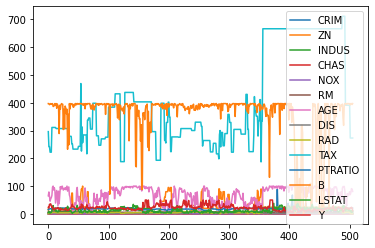

In [8]:
df.plot()

In [9]:
df.dropna(inplace=True)

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Reviso los scarter plot para cada variable vs su variable dependiente Y

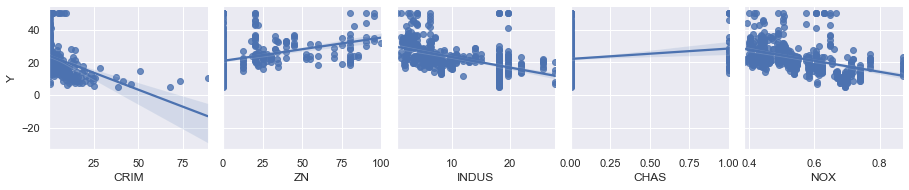

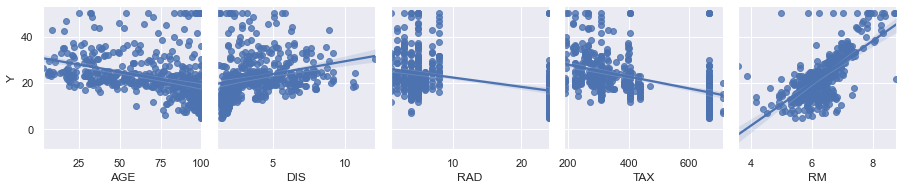

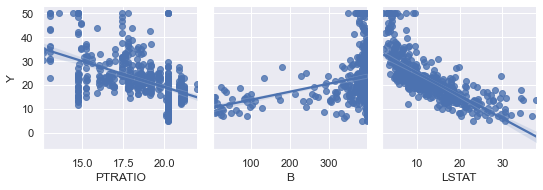

In [11]:
import seaborn as sns; sns.set()
sns.pairplot(df,x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX'],y_vars=['Y'] , kind="reg")
sns.pairplot(df,x_vars=[ 'AGE', 'DIS', 'RAD','TAX','RM'],y_vars=['Y'] , kind="reg")
sns.pairplot(df,x_vars=['PTRATIO', 'B', 'LSTAT'],y_vars=['Y'] , kind="reg")

In [15]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.r2_score(predictions,data[outcome])
    print("Rendimiento : %s" % "{0:.3%}".format(accuracy),predictors)
    return [accuracy,predictor_var]

## Siguiente codigo realizar 2 veces

In [32]:
outcome_var = 'Y'
model = linear_model.LinearRegression()
predictor_var = ['RM']
sol=classification_model(model,df,predictor_var,outcome_var)
print(sol)

Rendimiento : -6.814% ['RM']
[-0.06814344024510377, ['RM']]


In [17]:
import itertools
mayor=[-np.Infinity,0]
var_mod=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','RM']
for conjunto in list(itertools.combinations(var_mod[:],3)):
    outcome_var = 'Y'
    model = linear_model.LinearRegression()
    predictor_var = list(conjunto)
    if classification_model(model,df,predictor_var,outcome_var)[0]>mayor[0]:
        mayor=classification_model(model,df,predictor_var,outcome_var)
print(mayor[0]*100,str('%'),mayor[1])

Rendimiento : -140.468% ['CRIM', 'ZN', 'INDUS']
Rendimiento : -140.468% ['CRIM', 'ZN', 'INDUS']
Rendimiento : -180.414% ['CRIM', 'ZN', 'CHAS']
Rendimiento : -179.229% ['CRIM', 'ZN', 'NOX']
Rendimiento : -203.135% ['CRIM', 'ZN', 'AGE']
Rendimiento : -209.694% ['CRIM', 'ZN', 'DIS']
Rendimiento : -206.077% ['CRIM', 'ZN', 'RAD']
Rendimiento : -146.451% ['CRIM', 'ZN', 'TAX']
Rendimiento : -90.495% ['CRIM', 'ZN', 'PTRATIO']
Rendimiento : -90.495% ['CRIM', 'ZN', 'PTRATIO']
Rendimiento : -180.910% ['CRIM', 'ZN', 'B']
Rendimiento : 18.588% ['CRIM', 'ZN', 'LSTAT']
Rendimiento : 18.588% ['CRIM', 'ZN', 'LSTAT']
Rendimiento : 20.091% ['CRIM', 'ZN', 'RM']
Rendimiento : 20.091% ['CRIM', 'ZN', 'RM']
Rendimiento : -119.107% ['CRIM', 'INDUS', 'CHAS']
Rendimiento : -156.353% ['CRIM', 'INDUS', 'NOX']
Rendimiento : -155.371% ['CRIM', 'INDUS', 'AGE']
Rendimiento : -128.500% ['CRIM', 'INDUS', 'DIS']
Rendimiento : -159.642% ['CRIM', 'INDUS', 'RAD']
Rendimiento : -150.284% ['CRIM', 'INDUS', 'TAX']
Rendimiento 

Rendimiento : -52.684% ['CHAS', 'NOX', 'PTRATIO']
Rendimiento : -189.891% ['CHAS', 'NOX', 'B']
Rendimiento : 22.273% ['CHAS', 'NOX', 'LSTAT']
Rendimiento : 20.006% ['CHAS', 'NOX', 'RM']
Rendimiento : -334.679% ['CHAS', 'AGE', 'DIS']
Rendimiento : -223.307% ['CHAS', 'AGE', 'RAD']
Rendimiento : -159.661% ['CHAS', 'AGE', 'TAX']
Rendimiento : -91.225% ['CHAS', 'AGE', 'PTRATIO']
Rendimiento : -223.792% ['CHAS', 'AGE', 'B']
Rendimiento : 23.559% ['CHAS', 'AGE', 'LSTAT']
Rendimiento : 17.902% ['CHAS', 'AGE', 'RM']
Rendimiento : -344.249% ['CHAS', 'DIS', 'RAD']
Rendimiento : -207.855% ['CHAS', 'DIS', 'TAX']
Rendimiento : -140.080% ['CHAS', 'DIS', 'PTRATIO']
Rendimiento : -392.173% ['CHAS', 'DIS', 'B']
Rendimiento : 26.390% ['CHAS', 'DIS', 'LSTAT']
Rendimiento : 4.503% ['CHAS', 'DIS', 'RM']
Rendimiento : -192.949% ['CHAS', 'RAD', 'TAX']
Rendimiento : -133.085% ['CHAS', 'RAD', 'PTRATIO']
Rendimiento : -285.939% ['CHAS', 'RAD', 'B']
Rendimiento : 22.473% ['CHAS', 'RAD', 'LSTAT']
Rendimiento : 19.

In [17]:
X=boston.data[:,np.newaxis,5]

In [18]:
y=boston.target

Text(0, 0.5, 'Valor Medio')

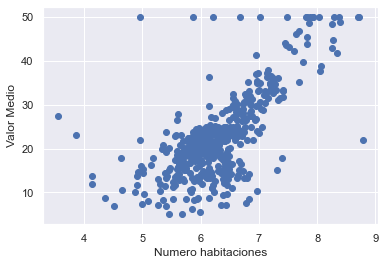

In [19]:
plt.scatter(X,y)
plt.xlabel('Numero habitaciones')
plt.ylabel('Valor Medio')

## Implementacion de registro lineal simple

In [20]:
from sklearn.model_selection import train_test_split

### Separo los datos en pruebas y entrenamiento para probar los algoritmos

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
lr=linear_model.LinearRegression()

### Defino el Algoritmo

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
Y_pred=lr.predict(X_test)

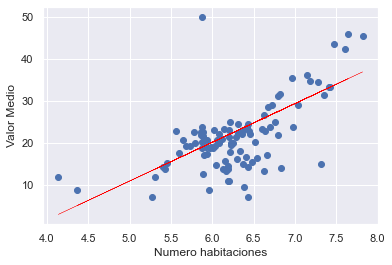

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color = 'red',linewidth=0.3)
plt.xlabel('Numero habitaciones')
plt.ylabel('Valor Medio')
plt.show()


In [38]:
lr.coef_

array([9.20086803])

In [39]:
lr.intercept_

-35.051437262786614

In [43]:
lr.score(X_train,y_train)

0.5024359852724163

# Regresion Lineal Multiple

In [3]:
from sklearn import linear_model,datasets,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
boston=datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
df=pd.DataFrame(boston.data)
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [49]:
df['Y']=boston.target

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
df.corr().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


## Toamos las columnas de 5 a 8

In [33]:
X_multiple=np.array(df[['PTRATIO', 'LSTAT', 'RM']])
X_multiple
y_multiple=boston.target

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_multiple,y_multiple,test_size=0.3)

In [205]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [206]:
Y_pred=lr.predict(X_test)

## Coeficiente, interceptos y $R^2$

In [207]:
lr.coef_

array([-0.82923929, -0.61808575,  4.21053292])

In [208]:
lr.intercept_

19.109266746163776

In [209]:
lr.score(X_train,y_train)

0.651557711546531

# Otros data sets

In [211]:
diabetes=datasets.load_diabetes()

In [213]:
datos=pd.DataFrame(diabetes.data)
datos.columns=diabetes.feature_names

In [216]:
datos['Y']=diabetes.target

In [218]:
datos.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [246]:
X_multiple=datos[['bmi','s5']]
y_multiple=datos['Y']

In [251]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_multiple,y_multiple,test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [248]:
Y_pred=lr.predict(X_train)

In [249]:
lr.coef_

array([939.04164217])

In [250]:
lr.score(X_train,y_train)

0.34245167582390423

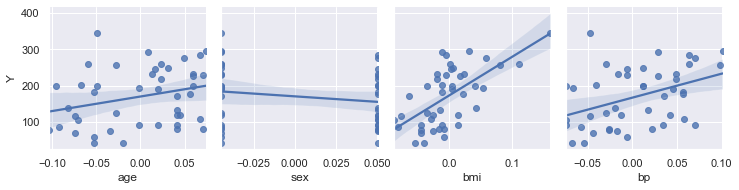

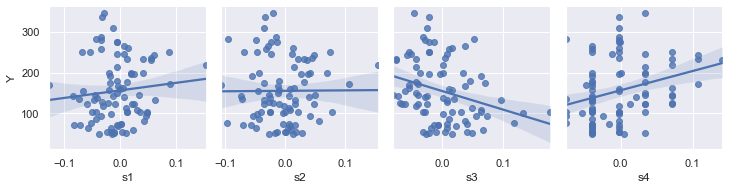

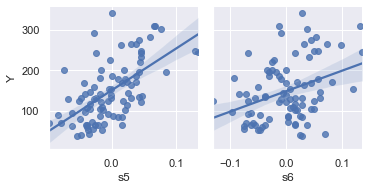

In [254]:
import seaborn as sns; sns.set()
sns.pairplot(datos.sample(frac=0.1),x_vars=['age', 'sex', 'bmi', 'bp'],y_vars=['Y'] , kind="reg")
sns.pairplot(datos.sample(frac=0.2),x_vars=[ 's1','s2', 's3', 's4'],y_vars=['Y'] , kind="reg")
sns.pairplot(datos.sample(frac=0.2),x_vars=['s5', 's6'],y_vars=['Y'] , kind="reg")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


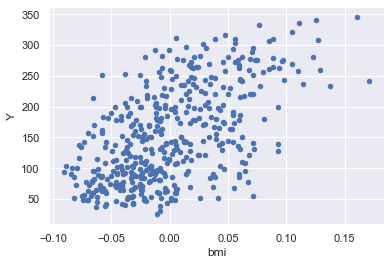

In [261]:
datos.plot(x='bmi',y='Y',kind='scatter')
plt.show()